In this example, we compute the coupling term $\xi^2\tilde{\mathcal A}^{*3}$ displayed in Eq. 85 in https://arxiv.org/abs/2304.13656.  

In [1]:
import sys
 
# setting path
sys.path.append('../')

from bosonic_diagram import Network
from sympy import Symbol, init_printing, integrate, Rational
init_printing()

In [2]:
# define bosonic variables of the oscillator and drive variables

A = Symbol('A') #annihilator of oscillator in the transformed space
As =  A.conjugate() 
xi = Symbol('xi')
xis =  xi.conjugate() 

wd = Symbol('omega_d') #drive frequenct
wA = Rational(2,3)*wd


inputs = [[(A, wA)], [(xi, wd)]]
Network.set_X0(inputs) #set A and xi as the possible inputs to the mixing diagram. 
                        #inputs[0] contains the quantum modes, and inputs[1] contains classical drives

Now we compute $\partial_{\tilde{\mathcal A}^*}\tilde{K}$ through diagrams. The sought after effective Hamiltonian is  $\tilde{K} = \Omega_{3,2}\xi^2\tilde{\mathcal A}^{*3}$, and therefore at the EOM level $\partial_{\tilde{\mathcal A}^*}\tilde{K} = 3\Omega_{3,2}\xi^2\tilde{\mathcal A}^{*2}$ contains 2 $\xi$ and 2 $\tilde{\mathcal A}^*$

In [3]:
inputs_list = [xi, xi, As, As]
networks = Network.with_sources(inputs_list, False, 0)#generate all possible networks
                                                    #first arg inputs_list defines all inputs in the diagram
                                                    #second arg specify if the network contains only even-wave mixer,
                                                    #which is the case in transmon
                                                    #third arg specify the number of $\delta$ factor in the effective Hamiltonian



Now we get all 34 possible _unorder diagram_ giving $\partial_{\tilde{\mathcal A}^*}\tilde{K} = 3\Omega_{3,2}\xi^2\tilde{\mathcal A}^{*2}$. We display three representational ones in them, corresponding to a 5-wave mixer along, a 3-wave mixer and a 4-wave mixer cascaded together, and three 3-wave mixer cascaded togther. See Eq. 80 in the reference

In [7]:
for i in [0,1,-1]:
    print(networks[i], "is evaluated as: ", networks[0].expression())

<-0r[1A*,2A*,3xi,4xi] is evaluated as:  6*g_5*xi**2*conjugate(A)**2
<-0r[1A*,2A*,->3[4xi,5xi]] is evaluated as:  6*g_5*xi**2*conjugate(A)**2
<-0r[->1[2A*,3xi],->4[5A*,6xi]] is evaluated as:  6*g_5*xi**2*conjugate(A)**2


If you have $\LaTeX$ installed for IPython, these expressions should displayed neatly in rendered $\LaTeX$ font

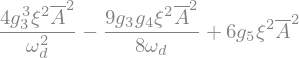

In [10]:
networks[0].expression() + networks[1].expression()+ networks[-1].expression()

Now we add up the expression associated with all diagrams generated

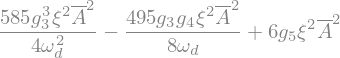

In [14]:
dAsK = 0
for ntwk in networks:
    dAsK += ntwk.expression()
dAsK

Note that this expression corresponds to $\partial_{\tilde{\mathcal A}^*}\tilde{K} = 3\Omega_{3,2}\xi^2\tilde{\mathcal A}^{*2}$. Upon inegration over $\tilde{\mathcal A}^*$ (or $\bar A$ in the expression generated from the code), we can get the expression fro $\tilde{K}$ which is the same as Eq. 85 in the reference.